In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid") 
from IPython.display import display
from IPython.core.pylabtools import getfigs

In [2]:
# useful links ---
# accuracy with cv - http://scikit-learn.org/stable/modules/cross_validation.html

In [3]:
saveas_path = '/Users/jamie/insight_data/figures/'

In [4]:
%matplotlib qt

In [5]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [6]:
n_samples = np.shape(X_df)[0]
shuffle_i = np.random.permutation(n_samples)

In [7]:
X = X_df.ix[shuffle_i,:]
y = outcomes_df.ix[shuffle_i,'Outcome'].values
n_samples, n_features = X.shape

In [8]:
from sklearn.externals import joblib
rf_best = joblib.load('decision_tree_best_june29/decision_tree_best.pkl') 

In [9]:
rf_best.get_params

<bound method DecisionTreeClassifier.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')>

In [19]:
from calc_model_cv_metrics import *
%load_ext autoreload
%autoreload 2

In [11]:
plot_roc_with_cv(rf_best)

(115196,)


In [12]:
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [13]:
plt.savefig(saveas_path+'best decision tree cv auc_3f.png',bbox_inches='tight',dpi=400) 

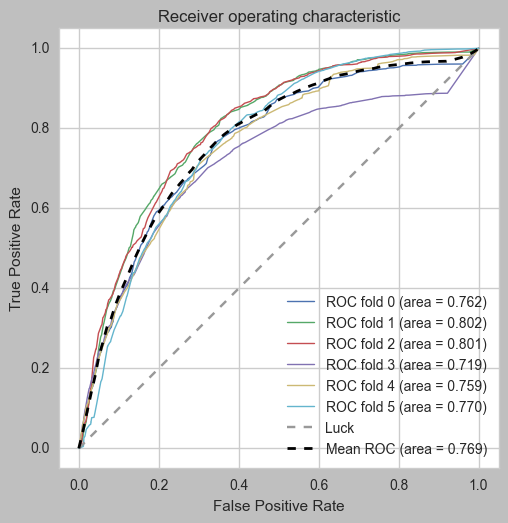

In [14]:
display(plt.gcf())

In [15]:
plt.close('all')

In [16]:
# now get cross validated accuracy, precision, recall, f1 score

In [17]:
scores = cross_validation.cross_val_score(rf_best, X, y, cv=5, n_jobs=-1)
print "Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.735 (+/- 0.00)


In [18]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='precision',cv=5, n_jobs=-1)
print "Precision: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Precision: 0.682 (+/- 0.01)


In [19]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='recall',cv=5, n_jobs=-1)
print "Recall: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Recall: 0.671 (+/- 0.02)


In [20]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='f1',cv=5, n_jobs=-1)
print "F1: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

F1: 0.676 (+/- 0.01)


In [14]:
# for feature importances, fit on all of the data
rf_best.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [15]:
X_df = pd.read_pickle('new_X_df.save')
X_cols = list(X_df.columns)

In [16]:
X_cols_nice = np.array(['Goal', 'Campaign days', 'Title n words', 'Blurbn words', 'Has video',\
               'N rewards', 'Min reward', 'Median reward', 'Max reward', 'Reward ship days',\
               'N links', 'N figs', 'Body n words', 'N campaigns creator backed',\
               'N campaigns creator created', 'Art', 'Comics', 'Crafts', 'Dance', 'Design',\
               'Fashion', 'Film', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',\
               'Technology', 'Theater', 'International ship', 'Monday launch', 'Tuesday launch',\
               'Wednesday launch', 'Thursday launch', 'Friday launch', 'Saturday launch', 'Sunday launch'])

In [17]:
print X_cols_nice

['Goal' 'Campaign days' 'Title n words' 'Blurbn words' 'Has video'
 'N rewards' 'Min reward' 'Median reward' 'Max reward' 'Reward ship days'
 'N links' 'N figs' 'Body n words' 'N campaigns creator backed'
 'N campaigns creator created' 'Art' 'Comics' 'Crafts' 'Dance' 'Design'
 'Fashion' 'Film' 'Food' 'Games' 'Journalism' 'Music' 'Photography'
 'Publishing' 'Technology' 'Theater' 'International ship' 'Monday launch'
 'Tuesday launch' 'Wednesday launch' 'Thursday launch' 'Friday launch'
 'Saturday launch' 'Sunday launch']


In [20]:
sns.set_style("whitegrid")
plot_feature_importances(rf_best.feature_importances_,X_cols_nice,\
                         len(X_cols_nice),'decision_tree')

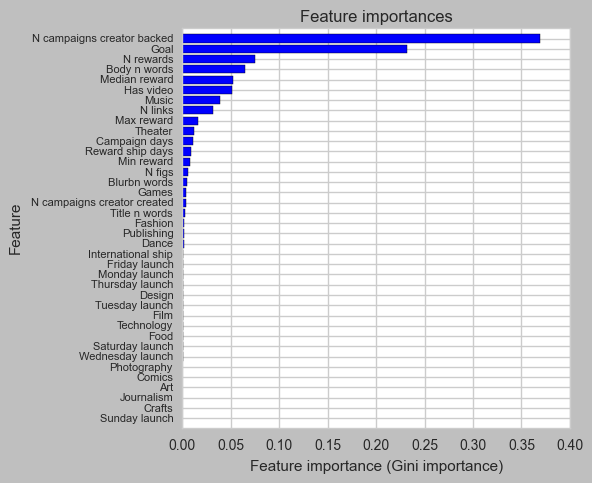

In [21]:
display(plt.gcf())